In [1]:
import numpy as np
import matplotlib.pyplot as plt

from izhikevich_rnn import Izhikevich
from test_models import LorenzAttractor

In [2]:
T = 15000
dt = 4e-2

t = np.arange(0, T, dt)

x = np.sin(2 * 5 * np.pi * t / 1000)
x = x.reshape(-1, 1)

In [3]:
def z_transform(signal):
    return (signal - signal.mean(axis=0)) / signal.std(axis=0)

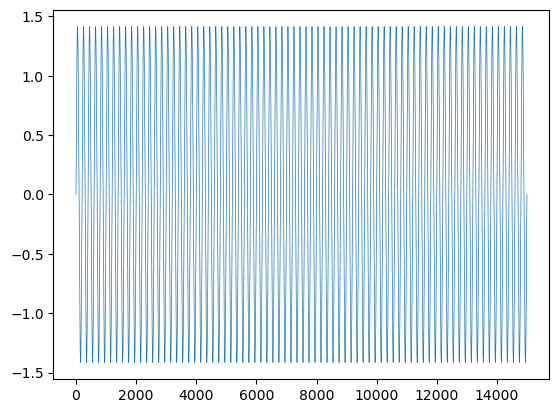

In [4]:
signal = z_transform(x)

plt.plot(t, signal[:, 0], lw=.5)
plt.show()

In [5]:
params = {
    "N": 2000,
    "C": 250,
    "v_r": -60,
    "v_t": -60 + 40 - (-2 / 2.5), # v_t = v_r + 40 - (b / k)
    "k": 2.5,
    "b": -2,
    "v_peak": 30,
    "v_reset": -65,
    "a": 0.01,
    "d": 200,
    "tau_r": 2,
    "tau_d": 20,
    "p": 0.1,
    "g": 5e3,
    "Q": 5e3,
    "I_BIAS": 1000,
    "l": 2,       
}

In [6]:
model = Izhikevich(supervisor=signal, T=T, dt=dt, **params)

In [7]:
voltage_trace = model.render(rls_start=5000, rls_stop=10000, rls_step=20, n_neurons=10)

100%|██████████| 375000/375000 [02:37<00:00, 2381.86it/s] 


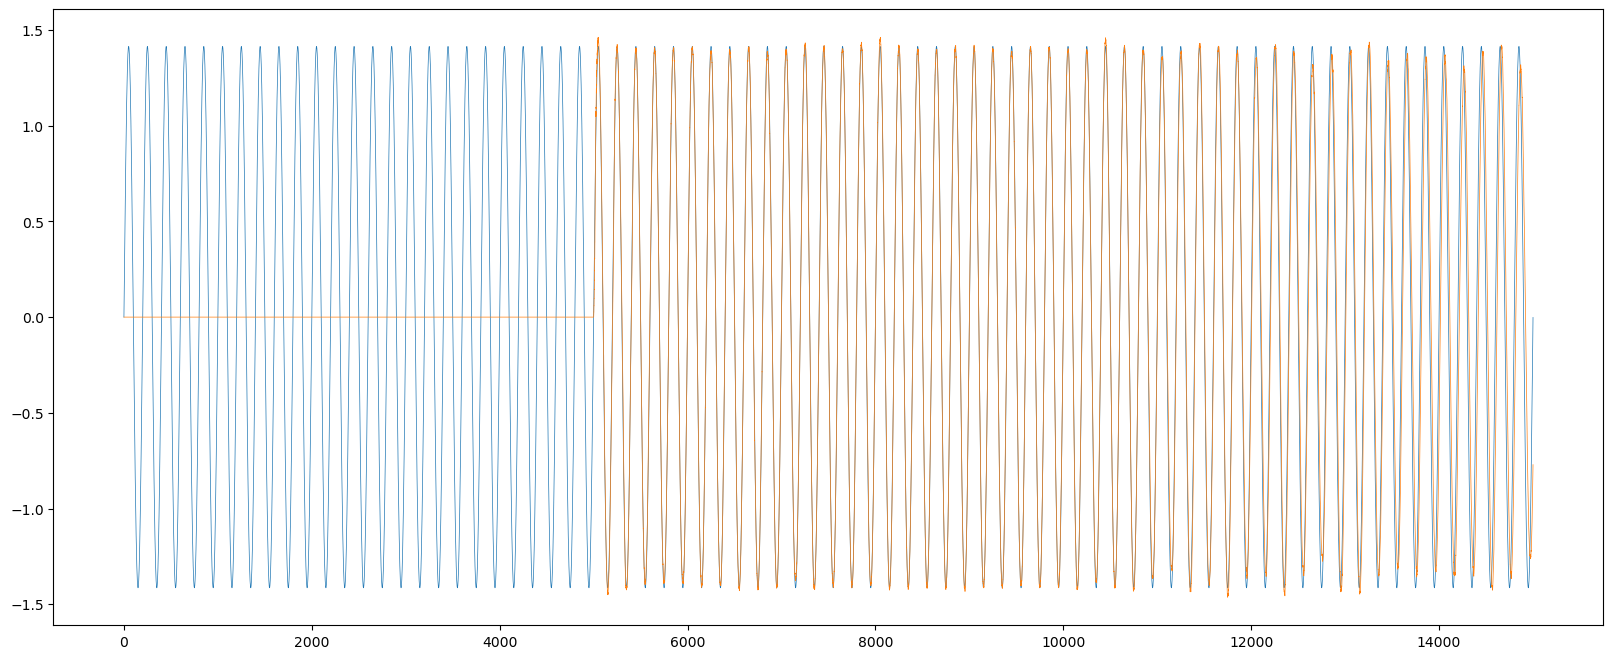

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(t, signal[:, 0], lw=.5)
ax.plot(t, model.x_hat_rec[:, 0], lw=.5)
plt.savefig("img/sin/output.jpg", dpi=200, bbox_inches="tight")

plt.show()

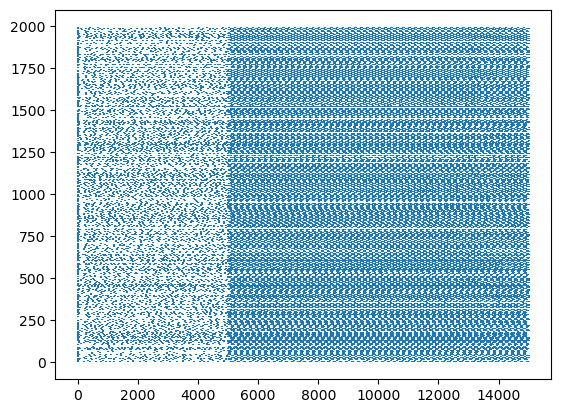

In [12]:
plt.eventplot(model.tspike)
plt.savefig("img/sin/rasterplot.jpg", dpi=200, bbox_inches="tight")
plt.show()

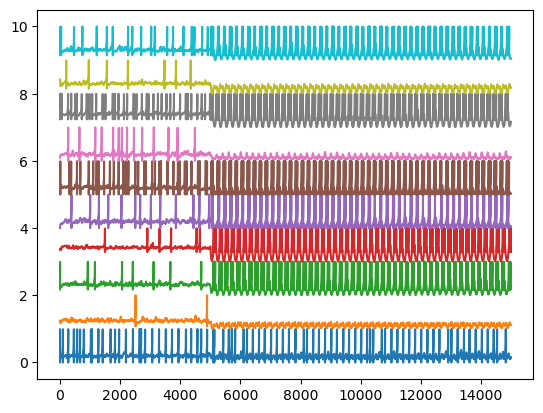

In [13]:
fig = plt.figure(31)
ax = fig.add_subplot()
for i in range(voltage_trace.shape[-1]):
    signal = voltage_trace[:, i]
    minim = np.min(signal)
    maxim = np.max(signal)
    signal = (signal - minim) / (maxim - minim) + i
    ax.plot(t, signal)
plt.savefig("img/sin/voltage_trace.jpg", dpi=200, bbox_inches="tight")
plt.show()